In [69]:
# Data processing
import pandas as pd
import numpy as np

# Data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [70]:
# Do not limit column width in pandas df
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 500)

# Open file
data = pd.read_csv('data/used_cars_250k.csv', index_col="id")
# data = data.sample(frac=1).reset_index(drop=True)

In [71]:
# data[data['main_picture_url']]
no_color = data[data['listing_color'] == 'UNKNOWN']
# no_color
no_color['main_picture_url'].isna().sum()

5294

#### Split to train & test

In [72]:
data_len = len(data)
train_len = int(0.8 * data_len)
train_data = data[:train_len]
test_data = data[train_len:]

### Exploration & Visualization

In [73]:
train_data.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
id,,,,,,,,,,,,,,,,,,,,,
616283,1GCRYEED6LZ342559,35.2 in,NaN,--,79.4 in,Pickup Truck,Crew Cab,Wooster,NaN,NaN,...,NaN,NaN,t86500,RST Double Cab 4WD,NaN,4WD,Four-Wheel Drive,147.5 in,81.2 in,2020
1850151,1G6AU5S85K0137336,35.4 in,NaN,NaN,NaN,Sedan,NaN,Dayton,16.0,NaN,...,A,8-Speed Automatic,t80440,3.6TT V-Sport RWD,NaN,RWD,Rear-Wheel Drive,114.6 in,80.8 in,2019
2806395,WAUYNGF5XJN006230,33.1 in,NaN,NaN,NaN,Convertible,NaN,Beverly Hills,24.0,NaN,...,A,Automatic,t73238,2.0T quattro Premium Plus Cabriolet AWD,NaN,AWD,All-Wheel Drive,108.9 in,79.9 in,2018
320098,4T1F11BK0LU013237,38 in,NaN,NaN,NaN,Sedan,NaN,Mount Laurel,NaN,NaN,...,A,Automatic,t92286,XLE AWD,NaN,AWD,All-Wheel Drive,111.2 in,72.4 in,2020
2342929,1FMCU0H63LUB66225,40.7 in,NaN,NaN,NaN,SUV / Crossover,NaN,Georgetown,27.0,NaN,...,A,Automatic,t86092,SEL FWD,NaN,FWD,Front-Wheel Drive,106.7 in,85.6 in,2020


In [74]:
train_data.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,166963.000000,0.0,200000.000000,188299.000000,166963.000000,188299.000000,0.0,200000.000000,2.000000e+05,200000.000000,190251.000000,98829.000000,2.000000e+05,200000.000000,197232.000000,199993.000000,0.0,200000.000000
mean,22.692058,NaN,76.147910,2970.029050,29.480759,248.255105,NaN,37.004608,2.754922e+08,-90.605683,31163.191836,1.534580,3.000463e+04,550.986505,4.269095,232670.970769,NaN,2017.722590
std,8.782580,NaN,108.944464,1346.853293,7.764411,90.490149,NaN,4.992714,8.902056e+06,13.909267,45424.072882,0.924395,2.020242e+04,1031.359053,0.514804,132476.669964,NaN,4.211003
min,9.000000,NaN,0.000000,700.000000,11.000000,65.000000,NaN,18.398800,8.393878e+07,-157.838000,0.000000,1.000000,2.000000e+02,0.000000,1.000000,41593.000000,NaN,1923.000000
25%,18.000000,NaN,14.000000,2000.000000,25.000000,175.000000,NaN,33.511600,2.745549e+08,-97.062200,6.000000,1.000000,1.849100e+04,0.000000,4.000000,63211.000000,NaN,2017.000000
50%,21.000000,NaN,36.000000,2500.000000,29.000000,245.000000,NaN,37.942600,2.785323e+08,-87.251700,8161.000000,1.000000,2.650000e+04,0.000000,4.341463,281404.000000,NaN,2020.000000
75%,26.000000,NaN,82.000000,3600.000000,33.000000,301.000000,NaN,41.028900,2.804444e+08,-80.378900,43700.000000,2.000000,3.839800e+04,789.000000,4.600000,336110.000000,NaN,2020.000000
max,127.000000,NaN,2337.000000,8400.000000,127.000000,1001.000000,NaN,48.923700,2.820222e+08,-66.078500,399578.000000,19.000000,1.995900e+06,56140.000000,5.000000,440798.000000,NaN,2021.000000


#### Dataset Size

In [75]:
train_data.shape

(200000, 66)

#### Columns & Data types

In [76]:
train_data.dtypes

vin                     object
back_legroom            object
bed                     object
bed_height              object
bed_length              object
                         ...  
wheel_system            object
wheel_system_display    object
wheelbase               object
width                   object
year                     int64
Length: 66, dtype: object

In [77]:
features_desc = '''vin: Vehicle Identification Number is a unique encoded string for every vehicle. A vehicle identification number (VIN) (also called a chassis number or frame number) is a unique code, including a serial number, used by the automotive industry to identify individual motor vehicles, towed vehicles, motorcycles, scooters and mopeds, as defined in ISO 3779 (content and structure) and ISO 4030 (location and attachment).
back_legroom: Legroom in the rear seat measured in inches.
bed: Category of bed size (open cargo area) in pickup truck. Null usually means the vehicle isn't a pickup truck.
bed_height: Height of bed in inches.
bed_length: Length of bed in inches.
body_type: Body Type of the vehicle. Like Convertible, Hatchback, Sedan, etc.
cabin: Category of cabin size (open cargo area) in pickup truck. Eg: Crew Cab, Extended Cab, etc.
city: City where the car is listed. Eg: Houston, San Antonio, etc.
city_fuel_economy: Fuel economy in city traffic in km per litre.
combine_fuel_economy: Combined fuel economy is a weighted average of City and Highway fuel economy in km per litre.
daysonmarket: Days since the vehicle was first listed on the website.
dealer_zip: Zipcode of the dealer.
description: Vehicle description on the vehicle's listing page.
engine_cylinders: The engine configuration. Eg: I4, V6, etc.
engine_displacement: Engine displacement is the measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers.
engine_type: The engine configuration. Eg: I4, V6, etc.
exterior_color: Exterior color of the vehicle, usually a fancy one same as the brochure.
fleet: Whether the vehicle was previously part of a fleet.
frame_damaged: Whether the vehicle has a damaged frame.
franchise_dealer: Whether the dealer is a franchise dealer.
franchise_make: The company that owns the franchise.
front_legroom: The legroom in inches for the passenger seat.
fuel_tank_volume: Fuel tank's filling capacity in gallons.
fuel_type: Dominant type of fuel ingested by the vehicle.
has_accidents: Whether the vin has any accidents registered.
height: Height of the vehicle in inches.
highway_fuel_economy: Fuel economy in highway traffic in km per litre.
horsepower: Horsepower is the power produced by an engine.
interior_color: Interior color of the vehicle, usually a fancy one same as the brochure.
isCab: Whether the vehicle was previously taxi/cab.
is_certified: Whether the vehicle is certified. Certified cars are covered through warranty period.
is_cpo: Pre-owned cars certified by the dealer. Certified vehicles come with a manufacturer warranty for free repairs for a certain time period.
is_new: If True means the vehicle was launched less than 2 years ago.
is_oemcpo: Pre-owned cars certified by the manufacturer.
latitude: Latitude from the geolocation of the dealership.
length: Length of the vehicle in inches.
listed_date: The date the vehicle was listed on the website. Does not make daysonmarket obsolete. The prices is dayson_market days after the listed date.
listing_color: Dominant color group from the exterior color.
listing_id: Listing id from the website.
longitude: Longitude from the geolocation of the dealership.
main_picture_url: URL of the vehicle's picture.
major_options: Optional packages of the vehicle.
make_name: Vehicle's brand.
maximum_seating: Total number of seats.
mileage: Refers to the distance that the vehicle has travelled, measured in miles.
model_name: Model name of the vehicle.
owner_count: Number of owners the vehicle has had along its life.
power: Maximum power of the vehicle and the rpm to develop the power.
price: Sale price of the vehicle on the website.
salvage: In North America, a salvage title is a form of vehicle title branding, which notes that the vehicle has been damaged and/or deemed a total loss by an insurance company that paid a claim on it.
savings_amount: Non defined variable.
seller_rating: The Seller Rating is created by data received from buyers in an effort to measure the quality of the experience you provide your customers.
sp_id: Dealer id.
sp_name: Dealer name.
theft_title: Vehicle that was stolen and later recovered.
torque: Torque indicates the force to which the drive shaft is subjected. Also the revolutions needed to reach the maximum torque.
transmission: Type of transmission, such as Automatic, Manual, etc.
transmission_display: Number of gears and type of transmission.
trimId: Number of a particular version of a model with a particular set of configuration.
trim_name: Name of a particular version of a model with a particular set of configuration.
vehicle_damage_category: Category of a vehicle's damage, such as Category A meaning a 'Scrap' car.
wheel_system: Traction system of a vehicle, such as AWD or FWD.
wheel_system_display: Traction system of a vehicle, such as All Wheel Drive or Front Wheel Drive.
wheelbase: The distance between the front and rear axles of a vehicle.
width: The distance between both sides of a vehicle.
year: The year the car was built.'''

lines = features_desc.split('\n')

id, description = [],[]
for line in lines:
  splitted = line.split(": ", 1)
  id.append(splitted[0])
  description.append(splitted[1])
df = pd.DataFrame({'Column Name' : id, 'Description' : description})
# df = df.style.set_properties(**{'text-align': 'left'})
df
        

,Column Name,Description
0,vin,"Vehicle Identification Number is a unique encoded string for every vehicle. A vehicle identification number (VIN) (also called a chassis number or frame number) is a unique code, including a serial number, used by the automotive industry to identify individual motor vehicles, towed vehicles, motorcycles, scooters and mopeds, as defined in ISO 3779 (content and structure) and ISO 4030 (location and attachment)."
1,back_legroom,Legroom in the rear seat measured in inches.
2,bed,Category of bed size (open cargo area) in pickup truck. Null usually means the vehicle isn't a pickup truck.
3,bed_height,Height of bed in inches.
4,bed_length,Length of bed in inches.
...,...,...
61,wheel_system,"Traction system of a vehicle, such as AWD or FWD."
62,wheel_system_display,"Traction system of a vehicle, such as All Wheel Drive or Front Wheel Drive."
63,wheelbase,The distance between the front and rear axles of a vehicle.
64,width,The distance between both sides of a vehicle.


### Data Cleaning

#### missing elements
removed columns with 60%+ missing values

In [78]:
threshold = 0.6 * train_data.shape[0]

missing_df = train_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>threshold]
missing_df

,column_name,missing_count
2,bed,198633
3,bed_height,171133
4,bed_length,171133
6,cabin,195706
9,combine_fuel_economy,200000
30,is_certified,200000
31,is_cpo,187732
33,is_oemcpo,190953
60,vehicle_damage_category,200000


In [79]:
cols_to_drop = list(missing_df["column_name"])
train_data.drop(cols_to_drop, axis=1,inplace=True)
test_data.drop(cols_to_drop, axis=1,inplace=True)

##### Shoudn't remove all Nulls...
owner_count is an important feature for used cars, but is missing 50% of its values!

In [80]:
threshold = 0.5 * train_data.shape[0]

missing_df = train_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df[missing_df['missing_count']>threshold]
missing_df

,column_name,missing_count
38,owner_count,101171


#### We want to fill the owner_count with the average owner count of cars from the same year.

In [81]:
len(train_data[train_data['year'] < 1995])

480

In [82]:
train_data.drop(train_data[train_data.year < 1995].index, inplace=True)
test_data.drop(test_data[test_data.year < 1995].index, inplace=True)

In [83]:
years = train_data["year"].unique()
owner_count_avgs = {year : train_data.loc[train_data['year'] == year]['owner_count'].mean() for year in years}
owner_count_avgs

{2020: 1.016171003717472,
 2019: 1.0642225192540258,
 2018: 1.1542182804368541,
 2015: 1.7857862903225807,
 2014: 1.9443436176648519,
 2021: 1.0,
 2016: 1.5547445255474452,
 2017: 1.175851987607453,
 2012: 2.158816771970132,
 2013: 2.0572904965176364,
 2010: 2.346007604562738,
 2009: 2.455375966268447,
 1999: 3.330578512396694,
 2003: 2.9334719334719335,
 2008: 2.6093073593073592,
 2005: 2.874698795180723,
 2011: 2.2418909592822636,
 2004: 2.8771929824561404,
 2007: 2.686457638425617,
 2002: 3.062874251497006,
 2001: 3.369047619047619,
 2006: 2.8238831615120277,
 1998: 4.0,
 2000: 3.2342857142857144,
 1995: 4.276595744680851,
 1997: 3.9655172413793105,
 1996: 3.324324324324324}

#### No data for 2021. we assume only 1 previous owner for new cars.

In [84]:
owner_count_avgs[2021] = 1

In [85]:
train_data[['year','owner_count']]

,year,owner_count
id,,
616283,2020,NaN
1850151,2019,NaN
2806395,2018,1.0
320098,2020,NaN
2342929,2020,NaN
...,...,...
124881,2017,1.0
2011151,2020,NaN
1243878,2016,2.0


In [86]:
def fill_owner_count(row):
    if row.owner_count:
        owner_count = round(owner_count_avgs[row.year])
        return owner_count
    return row.owner_count

train_data['owner_count'] = train_data.apply(fill_owner_count, axis=1)
test_data['owner_count'] = test_data.apply(fill_owner_count, axis=1)

#### Irrelevant Columns

vin (Vehicle Identity Number)  
dealer_zip (Zipcode of the dealer)  
description  
is_new (duplicate, already have the year column)  
latitude + longitude ()  
exterior_color + interior_color (already have the listing_color column)  
listing_id  
main_picture_url  
power (it is horsepower+rpm, we take the horsepower column)  
trimId  
trim_name  
wheel_system_display (duplicate of wheel_system)
engine_type (duplicate engine_cylinder)
savings_amount (not defined)
sp_id + sp_name (Dealer ID + Name)  
transmission_display - duplicate of transmission



##### major_options and torque are tricky columns to deal with:

In [87]:
major_options = train_data['major_options'].unique()
print(major_options)
len(major_options)

["['Bluetooth', 'Backup Camera']"
 "['Leather Seats', 'Sunroof/Moonroof', 'Navigation System', 'Preferred Package', 'Backup Camera']"
 "['Navigation System', 'Alloy Wheels', 'Bluetooth', 'Backup Camera', 'Heated Seats', 'Luxury Package']"
 ...
 "['Leather Seats', 'Sunroof/Moonroof', 'Navigation System', 'Bluetooth', 'Backup Camera', 'Blind Spot Monitoring', 'Heat Package', 'Premium Plus Package', 'Parking Sensors', 'Premium Package', 'Heated Seats', 'Cold Weather Package']"
 "['Sunroof/Moonroof', 'Alloy Wheels', 'Bluetooth', 'Premium Package', 'Convenience Package']"
 "['Navigation System', 'Alloy Wheels', 'Bluetooth', 'Backup Camera', 'Remote Start', 'Heat Package']"]


41898

What is the realtion between the units?

In [88]:
train_data['torque'].head()

id
616283     383 lb-ft @ 4,100 RPM
1850151    430 lb-ft @ 3,500 RPM
2806395    273 lb-ft @ 1,600 RPM
320098     182 lb-ft @ 4,400 RPM
2342929                      NaN
Name: torque, dtype: object

In [89]:
irrelevant_cols_to_drop = ["vin", "dealer_zip", "description", "is_new", "latitude", "longitude", "major_options", "transmission_display", "daysonmarket", "width", "height", "length", "listed_date", 'city',
"exterior_color", "listing_id", "main_picture_url", "power", "trimId", "trim_name","wheel_system_display", "engine_type", "interior_color", "savings_amount", "sp_id", "sp_name", "torque", 'franchise_make']
train_data.drop(irrelevant_cols_to_drop, axis=1, inplace=True)
test_data.drop(irrelevant_cols_to_drop, axis=1, inplace=True)

##### We have 30 columns left, down from 66

In [90]:
train_data.shape

(199520, 29)

Swapping weird symbols with NaN's

In [91]:
for variable in train_data.columns:
    train_data[variable] = train_data[variable].replace('--', np.nan)
    test_data[variable] = test_data[variable].replace('--', np.nan)

##### Remove units from float values

In [92]:
train_data['back_legroom'].head()

id
616283     35.2 in
1850151    35.4 in
2806395    33.1 in
320098       38 in
2342929    40.7 in
Name: back_legroom, dtype: object

In [93]:
colums_to_fix = ['back_legroom', 'front_legroom', 'fuel_tank_volume', 'maximum_seating','wheelbase']

for column in colums_to_fix:
        train_data[column] = train_data[column].apply(lambda x: x.split(' ')[0] if type(x)==str else 0)
        test_data[column] = test_data[column].apply(lambda x: x.split(' ')[0] if type(x)==str else 0)

##### define variable types

In [94]:
# Column types
binary_variables = ['fleet', 'frame_damaged', 'franchise_dealer', 'has_accidents', 'isCab', 'salvage', 'theft_title']
categorical_variables = ['body_type', 'engine_cylinders', 'fuel_type', 'listing_color', 'make_name', 'model_name', 'transmission', 'wheel_system', 'maximum_seating', 'owner_count']
numeric_variables = ['back_legroom', 'city_fuel_economy', 'engine_displacement', 'front_legroom', 'fuel_tank_volume', 'highway_fuel_economy', 'horsepower', 'mileage', 'seller_rating', 'wheelbase', 'year', 'price']

In [95]:
for variable in binary_variables:
    train_data[variable] = train_data[variable].astype(float)
    test_data[variable] = test_data[variable].astype(float)
for variable in categorical_variables:
    train_data[variable] = train_data[variable].astype("category")
    test_data[variable] = test_data[variable].astype("category")
for variable in numeric_variables:
    train_data[variable] = train_data[variable].astype(float)
    test_data[variable] = test_data[variable].astype(float)
train_data.describe()


,back_legroom,city_fuel_economy,engine_displacement,fleet,frame_damaged,franchise_dealer,front_legroom,fuel_tank_volume,has_accidents,highway_fuel_economy,horsepower,isCab,mileage,price,salvage,seller_rating,theft_title,wheelbase,year
count,199520.000000,166871.000000,188152.000000,104426.000000,104426.000000,199520.000000,199520.000000,199520.000000,104426.000000,166871.000000,188152.000000,104426.000000,189871.000000,1.995200e+05,104426.000000,196762.000000,104426.000000,199520.000000,199520.000000
mean,34.924536,22.696023,2969.161104,0.211576,0.009270,0.812736,39.768334,17.642638,0.153324,29.484824,248.297472,0.181928,31077.263837,2.998054e+04,0.006521,4.268511,0.003687,109.309917,2017.823115
std,10.756138,8.783220,1346.518167,0.408427,0.095833,0.390125,9.953081,6.761683,0.360301,7.764209,90.495603,0.385787,45351.478538,1.947050e+04,0.080492,0.514925,0.060607,29.396089,3.609339
min,0.000000,9.000000,700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,70.000000,0.000000,0.000000,2.000000e+02,0.000000,1.000000,0.000000,0.000000,1995.000000
25%,35.400000,18.000000,2000.000000,0.000000,0.000000,1.000000,41.000000,14.300000,0.000000,25.000000,175.000000,0.000000,6.000000,1.849500e+04,0.000000,4.000000,0.000000,105.900000,2017.000000
50%,38.000000,21.000000,2500.000000,0.000000,0.000000,1.000000,41.800000,17.200000,0.000000,29.000000,245.000000,0.000000,8000.000000,2.650000e+04,0.000000,4.337838,0.000000,110.600000,2020.000000
75%,39.700000,26.000000,3600.000000,0.000000,0.000000,1.000000,43.000000,21.000000,0.000000,33.000000,301.000000,0.000000,43546.500000,3.839900e+04,0.000000,4.600000,0.000000,118.100000,2020.000000
max,59.800000,127.000000,8400.000000,1.000000,1.000000,1.000000,67.000000,63.500000,1.000000,127.000000,1001.000000,1.000000,399578.000000,1.499999e+06,1.000000,5.000000,1.000000,179.800000,2021.000000


##### Dealing with null values

In [96]:
missing_df = train_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
imputed_variables = list(missing_df['column_name'])
imputed_variables

['body_type',
 'city_fuel_economy',
 'engine_cylinders',
 'engine_displacement',
 'fleet',
 'frame_damaged',
 'fuel_type',
 'has_accidents',
 'highway_fuel_economy',
 'horsepower',
 'isCab',
 'mileage',
 'salvage',
 'seller_rating',
 'theft_title',
 'transmission',
 'wheel_system']

#### Replace nulls with means & modes of that column

In [97]:
for variable in imputed_variables:
    if variable in numeric_variables:
        train_data[variable].fillna(value = train_data[variable].mean(), inplace=True)
        test_data[variable].fillna(value = train_data[variable].mean(), inplace=True)
    else:
        train_data[variable].fillna(value = train_data[variable].mode()[0], inplace=True)
        test_data[variable].fillna(value = train_data[variable].mode()[0], inplace=True)

### Visualization

#### Check for outliars using a boxplot

<AxesSubplot:xlabel='price'>

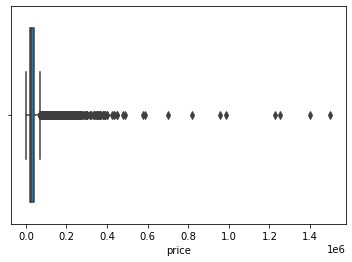

In [98]:
sns.boxplot(train_data["price"])

Removing outliers that cost more than 500K (only 3 in the df..)

In [99]:
len(train_data[train_data['price'] > 500000])

10

In [100]:
train_data.drop(train_data.loc[train_data['price']>500000].index, inplace=True)
test_data.drop(test_data.loc[test_data['price']>500000].index, inplace=True)
len(train_data[train_data['price'] > 500000])

0

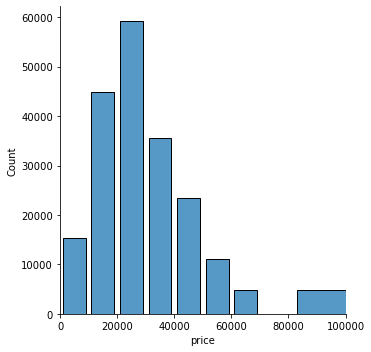

In [101]:
bins=[0,10000,20000,30000,40000,50000,60000,70000,200000]
sns.displot(train_data, x="price", bins=bins, shrink=.8)
plt.xlim(0, 100000)
plt.show()

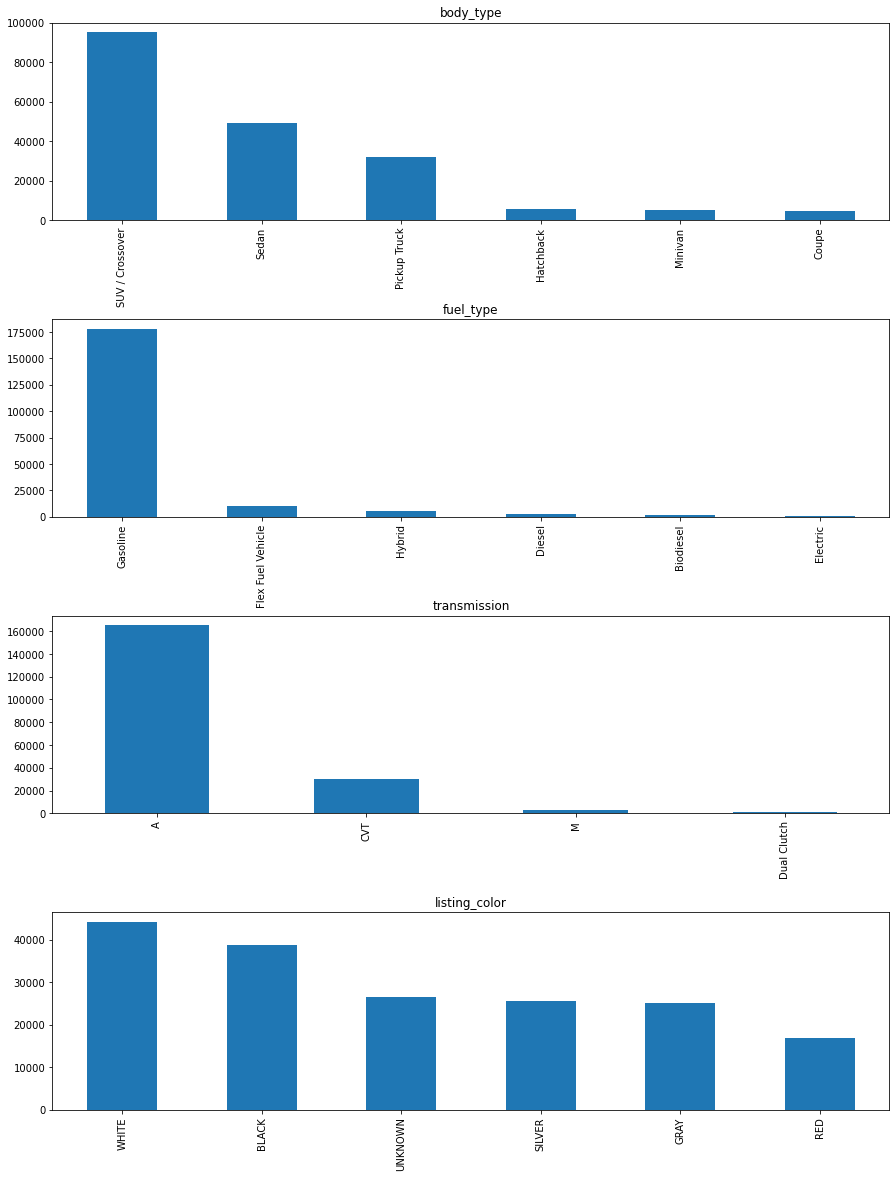

In [102]:
cols_to_graph = ['body_type', 'fuel_type', 'transmission','listing_color']
fig, axes = plt.subplots(4,figsize=(15,20))
fig.subplots_adjust(hspace=0.5)

#we will create a histogram for each categorical attribute
n=len(cols_to_graph)
max_bars = 6

for i,variable in enumerate(cols_to_graph):  
    #create the "value counts" for the first <max_bars> categories:
    u=min(train_data[variable].nunique(),max_bars)
    vc = train_data[variable].value_counts()[:u]
    
    # plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[i],title=variable)


### Correlation

<AxesSubplot:xlabel='engine_displacement', ylabel='horsepower'>

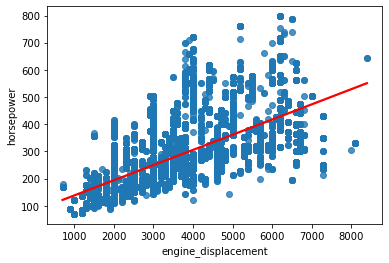

In [103]:
sns.regplot(data=train_data,x='engine_displacement',y='horsepower',line_kws={"color": "red"})

<AxesSubplot:xlabel='year', ylabel='owner_count'>

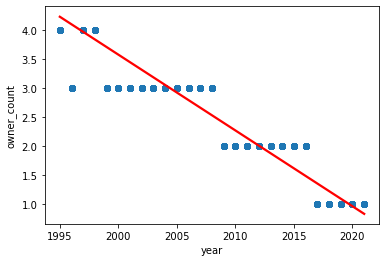

In [104]:
sns.regplot(data=train_data,x='year',y='owner_count',line_kws={"color": "red"})

<AxesSubplot:xlabel='owner_count', ylabel='price'>

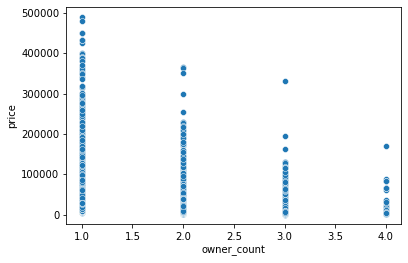

In [105]:
sns.scatterplot(data=train_data,x='owner_count',y='price')

<AxesSubplot:xlabel='horsepower', ylabel='city_fuel_economy'>

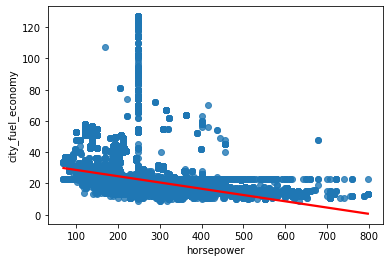

In [106]:
sns.regplot(data=train_data,x='horsepower',y='city_fuel_economy',line_kws={"color": "red"})

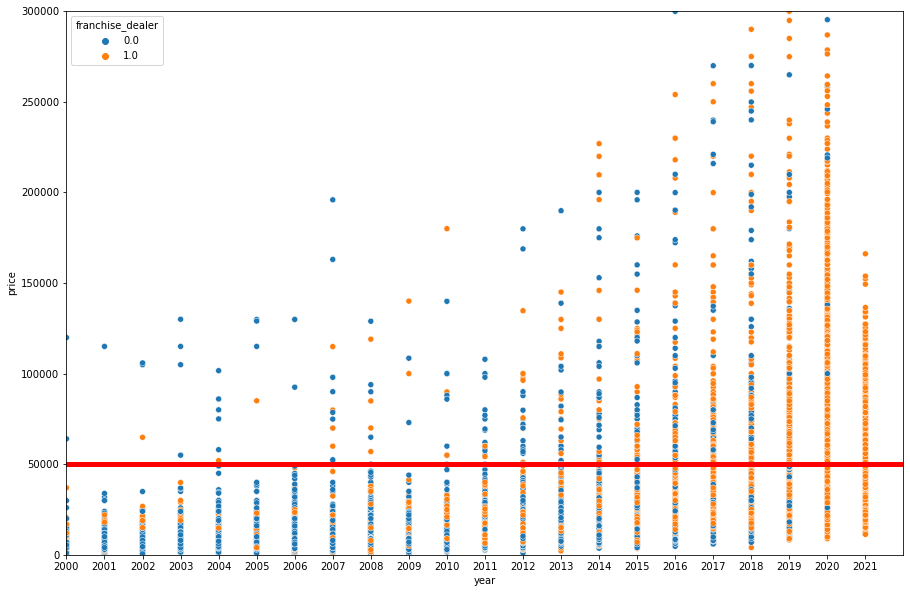

In [107]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=train_data,x='year', y='price', hue='franchise_dealer', ax=ax)
plt.plot([2000,2022], [50000,50000], color='red', linewidth=5)
ax.set_xticks(np.arange(2000,2022,1))
plt.xlim(2000, 2022)
plt.ylim(0, 300000)
plt.show()

<AxesSubplot:>

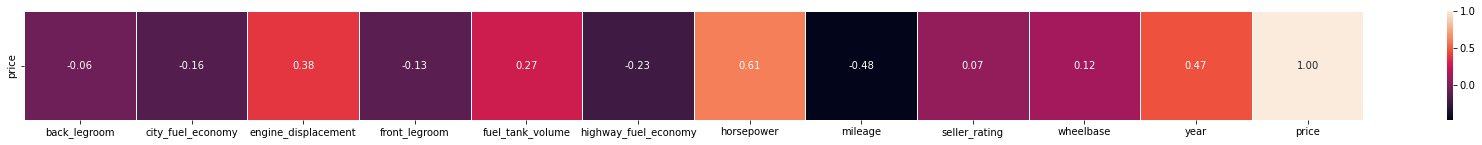

In [108]:
dtf_corr = train_data.corr(method="pearson").loc[["price"]]
fig, ax = plt.subplots(figsize=(30,2))

sns.heatmap(dtf_corr[numeric_variables], annot=True, fmt='.2f', cbar=True, linewidths=0.5,ax=ax)

### One Hot Encoding categorial data

In [109]:
oh_train = pd.DataFrame()
oh_test = pd.DataFrame()

for variable in binary_variables + numeric_variables:
    oh_train = pd.concat([oh_train,train_data[variable]],axis=1)
    oh_test = pd.concat([oh_test,test_data[variable]],axis=1)

for variable in categorical_variables:
    onehot_train_col = pd.get_dummies(train_data[variable],prefix=variable)
    oh_train = pd.concat([oh_train,onehot_train_col],axis=1)

    onehot_test_col = pd.get_dummies(test_data[variable],prefix=variable)
    oh_test = pd.concat([oh_test,onehot_test_col],axis=1)

In [110]:
add_to_test = list(set(oh_train.columns) - set(oh_test.columns))
add_to_train = list(set(oh_test.columns) - set(oh_train.columns))

for col in add_to_train:
    oh_train[col] = 0
for col in add_to_test:
    oh_test[col] = 0
oh_test=oh_test[oh_train.columns]

set(oh_test.columns) == set(oh_train.columns)

True

In [111]:
oh_train.shape

(199510, 1086)

### Linear Regression Model

Remove target column

In [112]:
x_train = oh_train.drop('price',axis=1)
x_test = oh_test.drop('price',axis=1)

y_train = oh_train['price']
y_test = np.array(oh_test['price'])

Train and predict (Linear Regression)

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(x_train,y_train).predict(x_test)

Results

In [45]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

print("R2 score: ",  r2_score(y_test,prediction))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = max(prediction) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
min_error = min(abs(prediction))
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], prediction[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))
print("Min Error:", "{:,.0f}".format(min_error))

R2 score:  -169843.12120992143
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 13.025
Mean Absolute Error (Σ|y-pred|/n): 97,015
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 7,397,146
Max Error: 434,645,001
Min Error: 2


In [46]:
print("Model coefficients:\n")
for i in range(len(x_train.columns)):
    print(x_train.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

fleet = -256.9241
frame_damaged = -192.0893
franchise_dealer = 1613.8995
has_accidents = -549.7009
isCab = -2782.3288
salvage = -1045.0033
theft_title = -883.8511
back_legroom = 344.7759
city_fuel_economy = 107.2762
engine_displacement = -0.9821
front_legroom = -392.7225
fuel_tank_volume = -179.4571
highway_fuel_economy = -180.2563
horsepower = 72.4145
mileage = -0.0602
seller_rating = 714.5424
wheelbase = 50.7652
year = 2061.6167
body_type_Convertible = -163481246.3117
body_type_Coupe = -163483616.7495
body_type_Hatchback = -163489440.9938
body_type_Minivan = -163495111.5104
body_type_Pickup Truck = -163490892.0775
body_type_SUV / Crossover = -163492249.3844
body_type_Sedan = -163490101.1344
body_type_Van = -163485161.2087
body_type_Wagon = -163488944.6087
engine_cylinders_H4 = 791300092.2832
engine_cylinders_H4 Hybrid = 365330978.8714
engine_cylinders_H6 = 791297486.9591
engine_cylinders_I2 = 791305027.5147
engine_cylinders_I3 = 791297749.2169
engine_cylinders_I4

##### Simple linear regression model SHAP

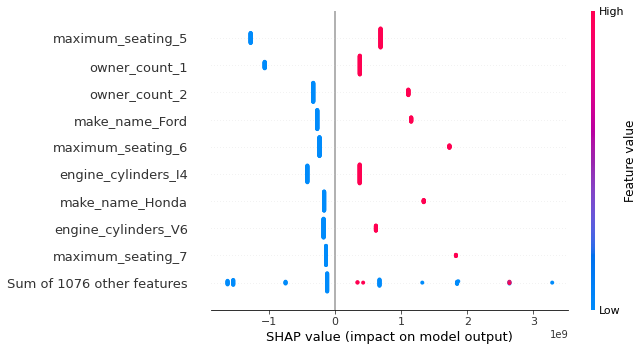

In [50]:
import shap
shap_sample = x_train.sample(100)
explainer = shap.Explainer(model.predict, shap_sample)
shap_values = explainer(shap_sample, max_evals=500)
shap.plots.beeswarm(shap_values)

#### Train and predict (XGBoost)

In [113]:
from xgboost import XGBRegressor
# create an xgboost regression model
xgb_model = XGBRegressor()
xgb_prediction = xgb_model.fit(x_train,y_train).predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

print("R2 score: ",  r2_score(y_test, xgb_prediction))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test, xgb_prediction)))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, xgb_prediction)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, xgb_prediction))))

# residuals
residuals = y_test - xgb_prediction
max_error = max(xgb_prediction) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
min_error = min(abs(xgb_prediction))
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], xgb_prediction[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))
print("Min Error:", "{:,.0f}".format(min_error))

R2 score:  0.9352716238016258
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.112
Mean Absolute Error (Σ|y-pred|/n): 2,949
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 4,605
Max Error: 372,621
Min Error: 12


Permutation explainer: 101it [00:14,  2.12it/s]                         


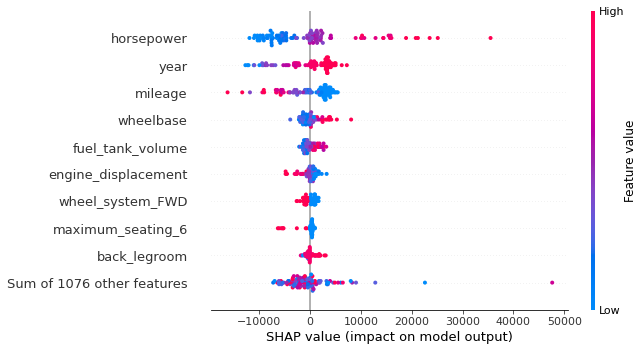

In [115]:
import shap
shap_sample = x_train.sample(100)
explainer = shap.Explainer(xgb_model.predict, shap_sample)
shap_values = explainer(shap_sample, max_evals=500)
shap.plots.beeswarm(shap_values)

In [116]:
# create an xgboost regression model
xgb_model_gblinear = XGBRegressor(booster='gblinear')
xgb_prediction_gblinear = xgb_model_gblinear.fit(x_train,y_train).predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

print("R2 score: ",  r2_score(y_test, xgb_prediction_gblinear))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test, xgb_prediction_gblinear)))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, xgb_prediction_gblinear)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, xgb_prediction_gblinear))))




R2 score:  0.8442468240403599
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.221
Mean Absolute Error (Σ|y-pred|/n): 4,628
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 7,143
Max Error: 356,552
Min Error: 2


In [130]:
# residuals
residuals = y_test - xgb_prediction_gblinear
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
min_error = min(abs(residuals))
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], xgb_prediction_gblinear[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))
print("Min Error:", "{:,.0f}".format(min_error))

Max Error: 215,444
Min Error: 0


In [117]:
print("XGB Model (gblinear) coefficients:\n")
for i in range(len(x_train.columns)):
    print(x_train.columns[i], "=", xgb_model_gblinear.coef_[i].round(4))

XGB Model (gblinear) coefficients:

fleet = -296.663
frame_damaged = -726.535
franchise_dealer = 2651.48
has_accidents = -1345.05
isCab = -1908.49
salvage = -1981.8
theft_title = -890.404
back_legroom = 180.642
city_fuel_economy = 32.2513
engine_displacement = 0.9512
front_legroom = -17.6136
fuel_tank_volume = 67.9536
highway_fuel_economy = -31.6471
horsepower = 37.0145
mileage = -0.1242
seller_rating = 106.255
wheelbase = -9.9252
year = -0.4769
body_type_Convertible = 7651.57
body_type_Coupe = 5617.7
body_type_Hatchback = -1848.3
body_type_Minivan = -1325.91
body_type_Pickup Truck = 960.209
body_type_SUV / Crossover = -895.449
body_type_Sedan = -2602.93
body_type_Van = 1770.47
body_type_Wagon = 593.413
engine_cylinders_H4 = -406.328
engine_cylinders_H4 Hybrid = -3536.86
engine_cylinders_H6 = -2639.65
engine_cylinders_I2 = 14272.1
engine_cylinders_I3 = 914.851
engine_cylinders_I4 = 318.898
engine_cylinders_I4 Compressed Natural Gas = 4465.4
engine_cylinders_I4 Diesel = 1065.73
engine_c

Permutation explainer: 101it [00:19,  2.49it/s]                         


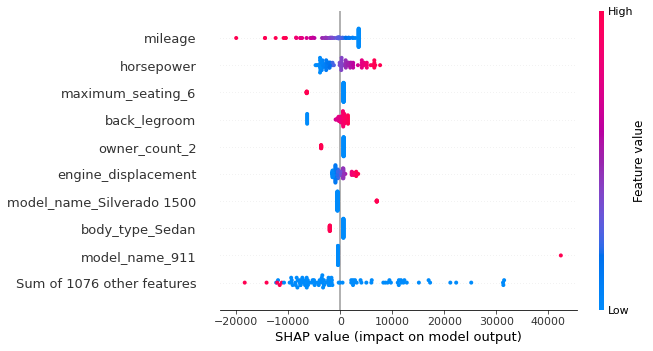

In [118]:
# shap_sample = x_train.sample(100)
explainer = shap.Explainer(xgb_model_gblinear.predict, shap_sample)
shap_values = explainer(shap_sample, max_evals=500)
shap.plots.beeswarm(shap_values)

In [122]:
test_data['residuals'] = residuals

In [144]:
test_data.sort_values('residuals', ascending=True)

,back_legroom,body_type,city_fuel_economy,engine_cylinders,engine_displacement,fleet,frame_damaged,franchise_dealer,front_legroom,fuel_tank_volume,...,owner_count,price,salvage,seller_rating,theft_title,transmission,wheel_system,wheelbase,year,residuals
id,,,,,,,,,,,,,,,,,,,,,
1151689,42.3,Sedan,13.000000,V12,6600.0,0.0,0.0,0.0,41.7,21.8,...,2,93990.0,0.0,4.500000,0.0,A,RWD,129.7,2013.0,-83662.250000
216294,38.4,Sedan,13.000000,V8,4200.0,0.0,0.0,0.0,41.3,23.0,...,3,7450.0,0.0,4.833333,0.0,A,AWD,113.4,2002.0,-81097.273438
130836,43.5,Sedan,11.000000,V12,6700.0,0.0,0.0,1.0,41.0,26.4,...,2,189000.0,0.0,3.142857,0.0,A,RWD,140.6,2015.0,-74911.312500
108965,0.0,Coupe,13.000000,V12,5900.0,0.0,0.0,1.0,0.0,20.5,...,2,121900.0,0.0,5.000000,0.0,A,RWD,107.9,2014.0,-73514.203125
1112705,0.0,Coupe,16.000000,V8,4000.0,0.0,0.0,0.0,0.0,19.8,...,1,72995.0,0.0,4.303030,0.0,A,RWD,103.5,2017.0,-72636.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838820,0.0,Convertible,12.000000,V8,4800.0,0.0,0.0,1.0,42.8,19.0,...,3,188888.0,0.0,4.969697,0.0,M,RWD,98.6,2003.0,152089.687500
2786692,41.9,SUV / Crossover,11.000000,V8,4000.0,0.0,0.0,0.0,52.5,25.4,...,1,274950.0,0.0,5.000000,0.0,A,AWD,112.2,2018.0,156747.156250
1540686,0.0,Coupe,15.000000,V8,3900.0,0.0,0.0,0.0,0.0,22.7,...,1,459000.0,0.0,4.666667,0.0,A,RWD,104.3,2020.0,163999.343750


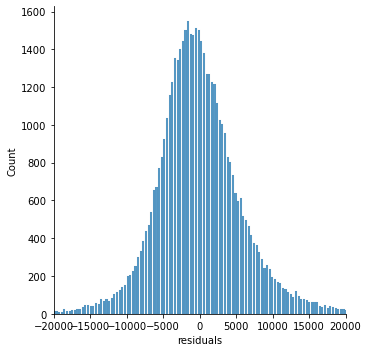

In [142]:
sns.displot(test_data, x="residuals", shrink=.8)
plt.xlim(-20000,20000)
plt.show()

In [148]:
test_data['residuals'].describe()

count     49879.000000
mean        -32.299721
std        7142.802100
min      -83662.250000
25%       -3557.084961
50%        -450.857422
75%        3084.451172
max      215443.531250
Name: residuals, dtype: float64

In [154]:
std = test_data['residuals'].describe()['std']

over_estimation = test_data[test_data['residuals'] > std].sort_values('residuals', ascending=False)
under_estimation = test_data[test_data['residuals'] < -std].sort_values('residuals', ascending=True)

In [ ]:
under_estimation

In [ ]:
over_estimation

<AxesSubplot:>

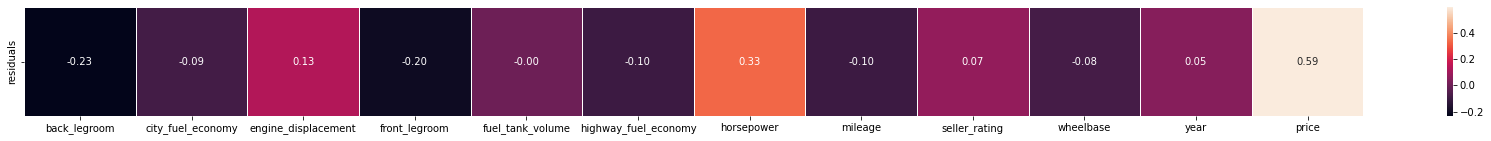

In [162]:
dtf_corr = over_estimation.corr(method="pearson").loc[["residuals"]]
fig, ax = plt.subplots(figsize=(30,2))

sns.heatmap(dtf_corr[numeric_variables], annot=True, fmt='.2f', cbar=True, linewidths=0.5,ax=ax)


<AxesSubplot:>

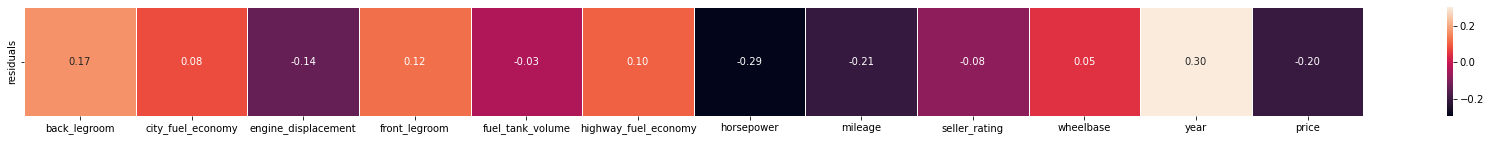

In [163]:
dtf_corr = under_estimation.corr(method="pearson").loc[["residuals"]]
fig, ax = plt.subplots(figsize=(30,2))

sns.heatmap(dtf_corr[numeric_variables], annot=True, fmt='.2f', cbar=True, linewidths=0.5,ax=ax)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(60, 60), dpi=50)
ax = fig.add_subplot(111, projection = '3d')

x = over_estimation['price']
y = over_estimation['residuals']
z = over_estimation['year']

ax.set_xlabel("price", fontsize=40)
ax.set_ylabel("residuals", fontsize=40)
ax.set_zlabel("year", fontsize=40)


ax.scatter(x, y, z)


# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
	label.set_fontsize(40)
	

plt.show()

In [179]:
!pip install plotly

     |████████████████████████████████| 15.2 MB 300 kB/s eta 0:00:01


In [190]:
import plotly.graph_objects as go

#controls the numer of rows to be read in the dataframe
start, end = 0, 20000
fig = go.Figure(data=go.Scatter3d(
    x=over_estimation['price'][start:end],
    y=over_estimation['residuals'][start:end],
    z=over_estimation['horsepower'][start:end],
    text=over_estimation['model_name'][start:end],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=12000,
        size=3, #over_estimation['price'][start:end],
        color = over_estimation['year'][start:end],
        colorscale = 'Viridis',
        colorbar_title = 'year',
        line_color='rgb(140, 140, 170)'
    )
))


fig.update_layout(height=1200, width=1500,
                  title='3-D Graph - X-price, Y-residuals, Z-year, Size-Price,Color-Highway MPG')